In [1]:
library(ggplot2)
library(ggthemes)
library(lubridate)
install.packages('anytime')
library(anytime)
library(dbplyr)
chicago = read.csv('chicago.csv', sep = ',')
newyork = read.csv('new-york-city.csv', sep = ',')
washington = read.csv('washington.csv', sep = ',')

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'ggthemes' was built under R version 3.6.3"Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Installing package into 'C:/Users/Hp/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'anytime' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'anytime'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Hp\Documents\R\win-library\3.6\00LOCK\anytime\libs\x64\anytime.dll to C:\Users\Hp\Documents\R\win-library\3.6\anytime\libs\x64\anytime.dll: Permission denied"Warning message:
"restored 'anytime'"


The downloaded binary packages are in
	C:\Users\Hp\AppData\Local\Temp\RtmpAjbvFh\downloaded_packages


Warning message:
"package 'anytime' was built under R version 3.6.3"Warning message:
"package 'dbplyr' was built under R version 3.6.3"

In [2]:
##We can observe that the chicago time format is in DD/MM/YYYY HH:MM as against YYYY/MM/DD HH:MM:SS
##Convert the datetime format of the chicago Start and End Times to the standard format
chicago$Start.Time <- strptime(as.character(chicago$Start.Time), "%d/%m/%Y %H:%M")
chicago$End.Time <- strptime(as.character(chicago$End.Time), "%d/%m/%Y %H:%M")

#appending a column for aliases to each city for easy differentiation in a combined table
chicago$alias=as.factor('chi')
washington$alias=as.factor('wash')
newyork$alias=as.factor('ny')

In [3]:
##Creating a table combining matching columns of all three cities.

##finding the matching column names present in all data set
common.names1 <- intersect(colnames(chicago), colnames(newyork))
common.names1 <- intersect(common.names1, colnames(washington))
##combining the 3 data sets into 1 based on the common names
combined.trips1 <- rbind(chicago[, common.names1], newyork[, common.names1], washington[, common.names1])

In [18]:
#creating columns for the Start Hours from the Start.Time
combined.trips1$start_hour = hour(combined.trips1$Start.Time)
combined.trips1$start_hour=as.factor(combined.trips1$start_hour)
#creating columns for the day of the week from the Start.Time
combined.trips1$start_dow = wday(combined.trips1$Start.Time)
combined.trips1$start_dow=as.factor(combined.trips1$start_dow)
#creating columns for the weekday from the Start day of the week
combined.trips1$start_weekday <- combined.trips1$start_dow %in% 2:6
combined.trips1$start_weekday <- as.factor(combined.trips1$start_weekday)
## Assigning Strings to each day of the week
levels(combined.trips1$start_weekday) <- c("Weekend", "Weekday")
levels(combined.trips1$start_dow) <- c("Su", "Mo", "Tu", "We", "Th", "Fr", "Sa")
#creating columns for the months from the Start.Time
combined.trips1$trip_month = month(combined.trips1$Start.Time)
combined.trips1$trip_month=as.factor(combined.trips1$trip_month)
levels(combined.trips1$trip_month) <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")

# Question 1

Popular Times Of Travel:
a. What is the most popular hour of the day when trips are taken in each of the city.
b. What day of the week have the most trips in each of the city.
c. What is the most popular month

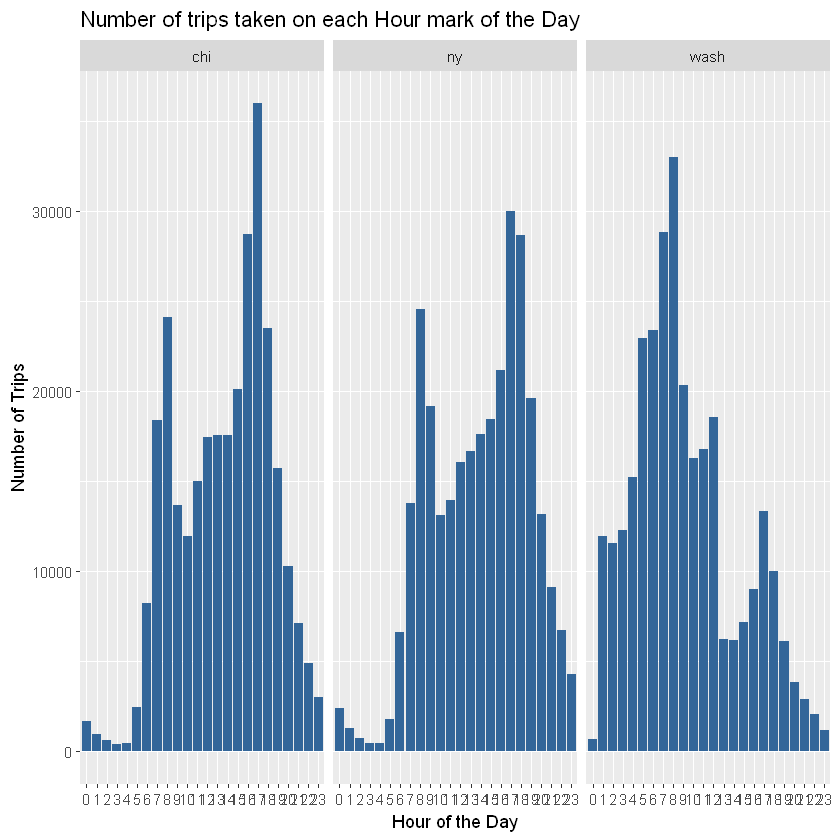

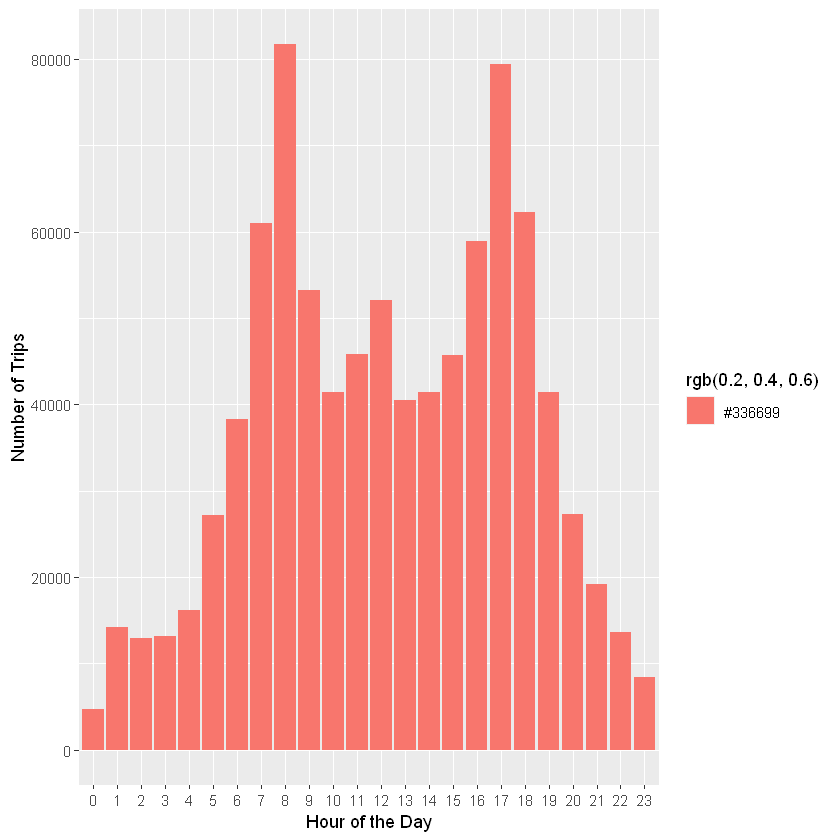

In [35]:
# Answer A

## A plot to show number of trips taken for each hour of the day for each of the 3 cities
ggplot(aes(x= start_hour), data = combined.trips1) +
  geom_bar(stat = "count", fill=rgb(0.2, 0.4, 0.6)) +
  labs(x= "Hour of the Day", y = "Number of Trips") +
  ggtitle ("Number of trips taken on each Hour mark of the Day") +
  facet_wrap(~alias)
## A plot to show number of trips taken for each hour of the day for all the cities combined
qplot(x= start_hour, data = combined.trips1, fill=rgb(0.2, 0.6, 0.6))+
  labs(x= "Hour of the Day", y = "Number of Trips")

In [102]:
##summary showing the total count of the start hour for each city
by(combined.trips1$start_hour, combined.trips1$alias, summary)

combined.trips1$alias: chi
    0     1     2     3     4     5     6     7     8     9    10    11    12 
 1686   982   609   372   467  2437  8246 18380 24134 13691 11952 15040 17467 
   13    14    15    16    17    18    19    20    21    22    23 
17559 17596 20108 28742 35992 23512 15715 10301  7103  4895  3014 
------------------------------------------------------------ 
combined.trips1$alias: ny
    0     1     2     3     4     5     6     7     8     9    10    11    12 
 2398  1287   740   446   480  1797  6618 13775 24581 19164 13134 13946 16066 
   13    14    15    16    17    18    19    20    21    22    23 
16686 17630 18455 21161 30041 28702 19611 13184  9120  6713  4265 
------------------------------------------------------------ 
combined.trips1$alias: wash
    0     1     2     3     4     5     6     7     8     9    10    11    12 
  656 11942 11561 12290 15223 22931 23381 28848 33019 20360 16315 16813 18576 
   13    14    15    16    17    18    19    20    21

It can be observed by both the plots and the summary that there 2 peak hours; 8am and 5pm. Which suggest the opening and closing times for businesses. It can also be seen from the plot of the combined trips that there's a notable peak around 12pm which suggest breaktime trips.

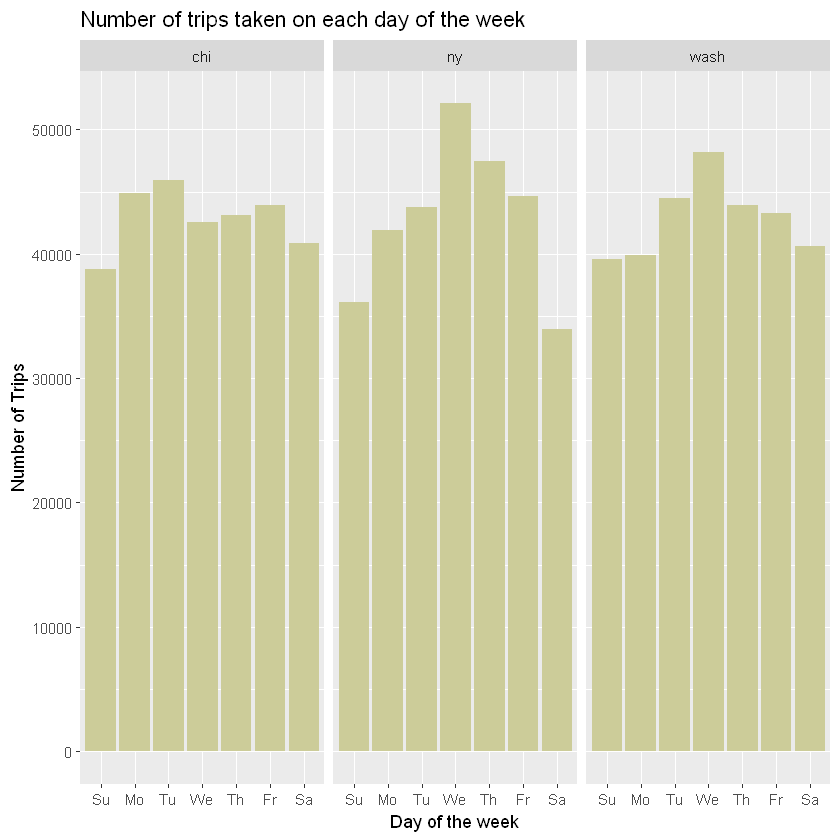

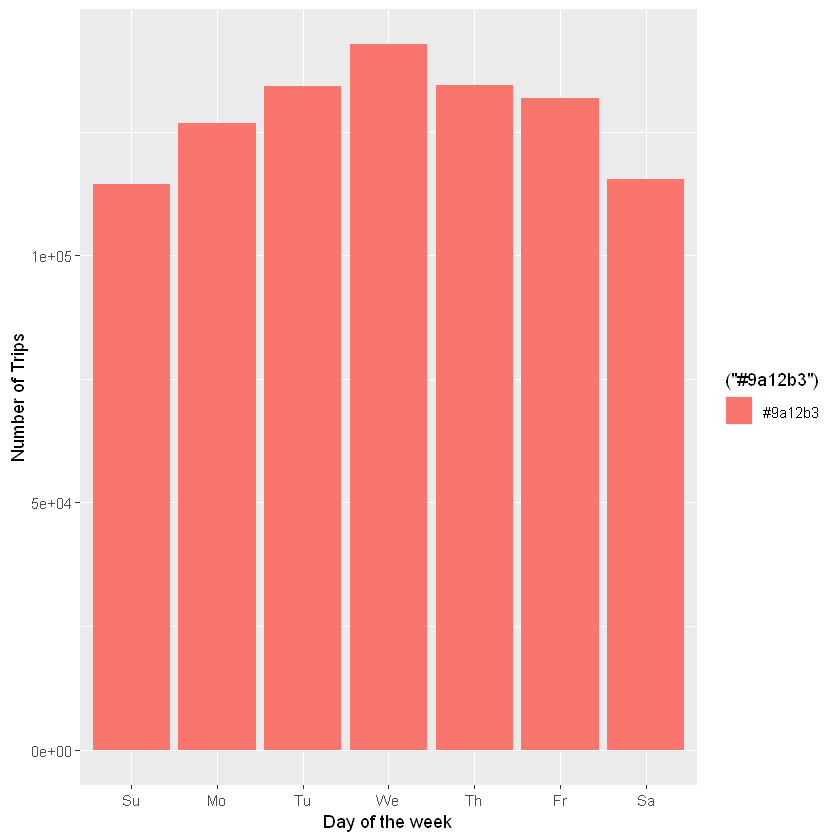

In [70]:
# Answer B

## A plot to show number of trips taken for each day of the week for each of the 3 cities
ggplot(aes(x= start_dow), data = combined.trips1) +
  geom_bar(stat = "count", fill=rgb(0.8, 0.8, 0.6)) +
  labs(x= "Day of the week", y = "Number of Trips") +
  ggtitle ("Number of trips taken on each day of the week") +
  facet_wrap(~alias)
## A plot to show number of trips taken for each day of the week for all the cities combined
qplot(x= start_dow, data = combined.trips1, fill= ('#9a12b3'))+
  labs(x= "Day of the week", y = "Number of Trips")

In [103]:
##summary showing the total count of the day of the week the trips were taken for each city
by(combined.trips1$start_dow, combined.trips1$alias, summary)

combined.trips1$alias: chi
   Su    Mo    Tu    We    Th    Fr    Sa 
38775 44881 45912 42530 43095 43922 40885 
------------------------------------------------------------ 
combined.trips1$alias: ny
   Su    Mo    Tu    We    Th    Fr    Sa 
36151 41923 43752 52087 47497 44664 33926 
------------------------------------------------------------ 
combined.trips1$alias: wash
   Su    Mo    Tu    We    Th    Fr    Sa 
39576 39930 44519 48156 43946 43280 40593 

The most popular day of the week is Wednesday

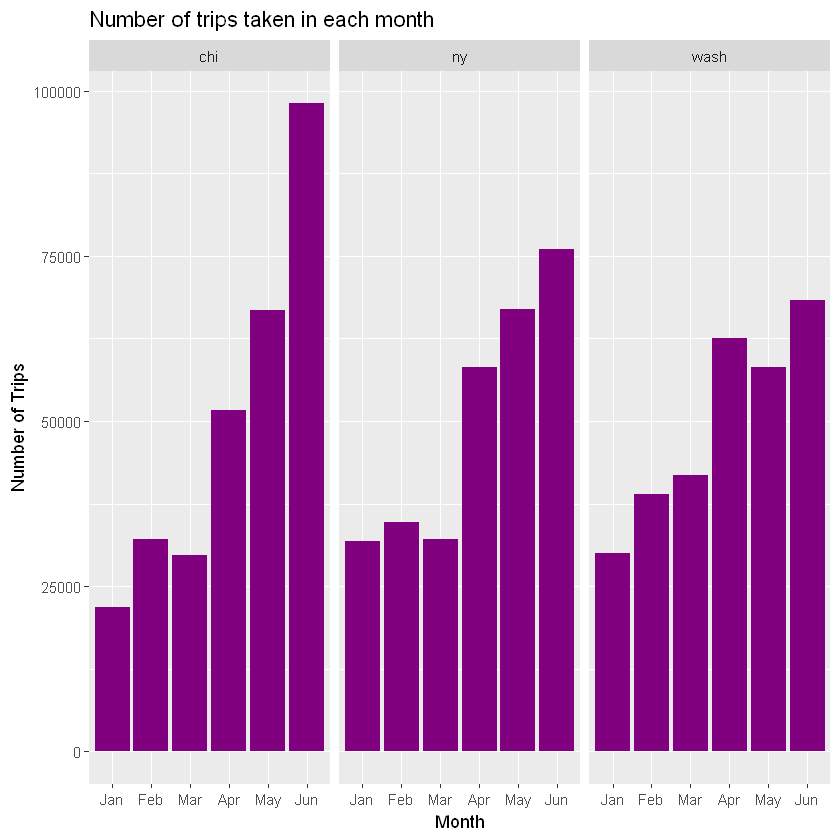

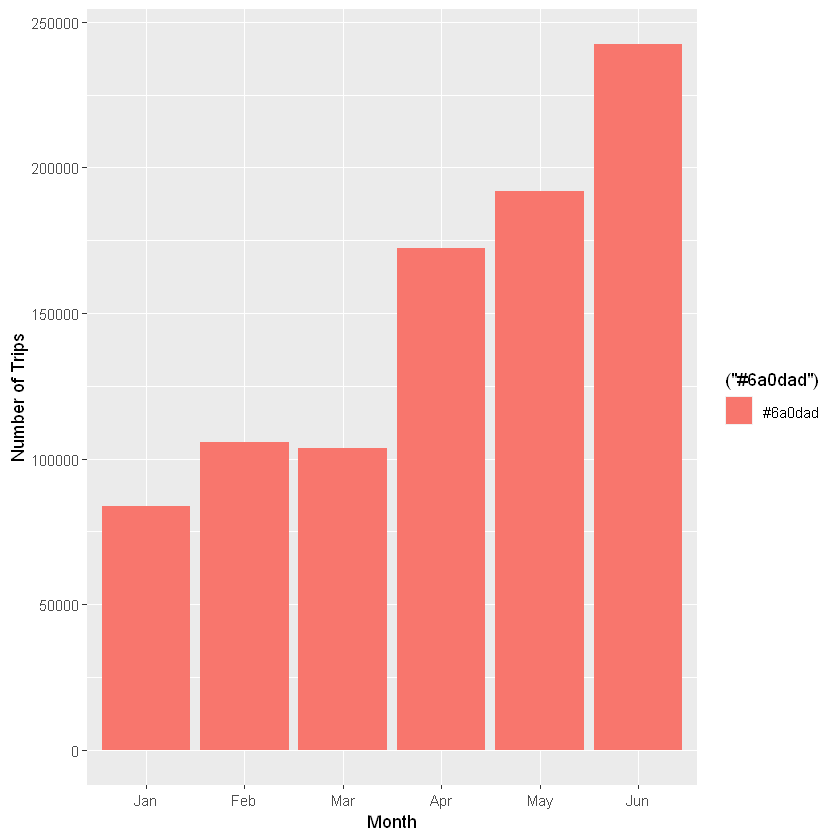

In [69]:
# Answer C

## A plot to show number of trips taken for each month
ggplot(aes(x= trip_month), data = combined.trips1) +
  geom_bar(stat = "count", fill=('#800080')) +
  labs(x= "Month", y = "Number of Trips") +
  ggtitle ("Number of trips taken in each month") +
  facet_wrap(~alias)
## A plot to show number of trips taken in each month for all the cities combined
qplot(x= trip_month, data = combined.trips1, fill=('#6a0dad'))+
  labs(x= "Month", y = "Number of Trips")

In [104]:
##summary showing the total count of the months the trips were taken for each city
by(combined.trips1$trip_month, combined.trips1$alias, summary)

combined.trips1$alias: chi
  Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec 
21809 32057 29639 51659 66755 98081     0     0     0     0     0     0 
------------------------------------------------------------ 
combined.trips1$alias: ny
  Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec 
31882 34741 32164 58176 67015 76022     0     0     0     0     0     0 
------------------------------------------------------------ 
combined.trips1$alias: wash
  Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec 
30053 38932 41863 62620 58193 68339     0     0     0     0     0     0 

Most of the trips were taken in June in all 3 cities.

# Question 2

Popular stations and trip

   a. What is the most common start station?
   b. What is the most common end station?
   c. What is the most common trip from start to end (i.e., most frequent combination of start station and end station)?


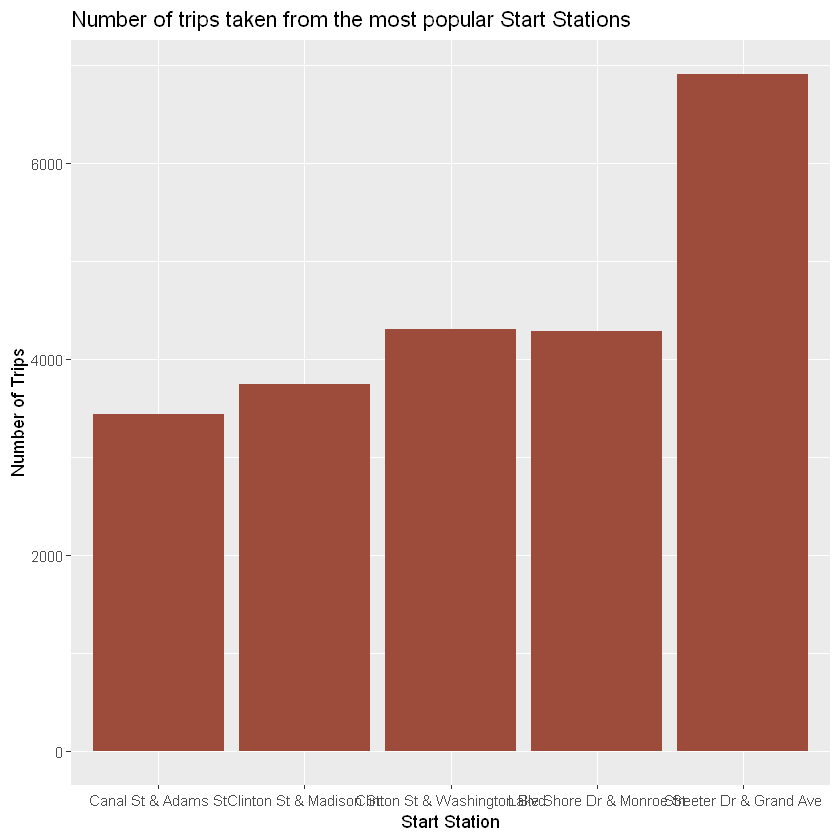

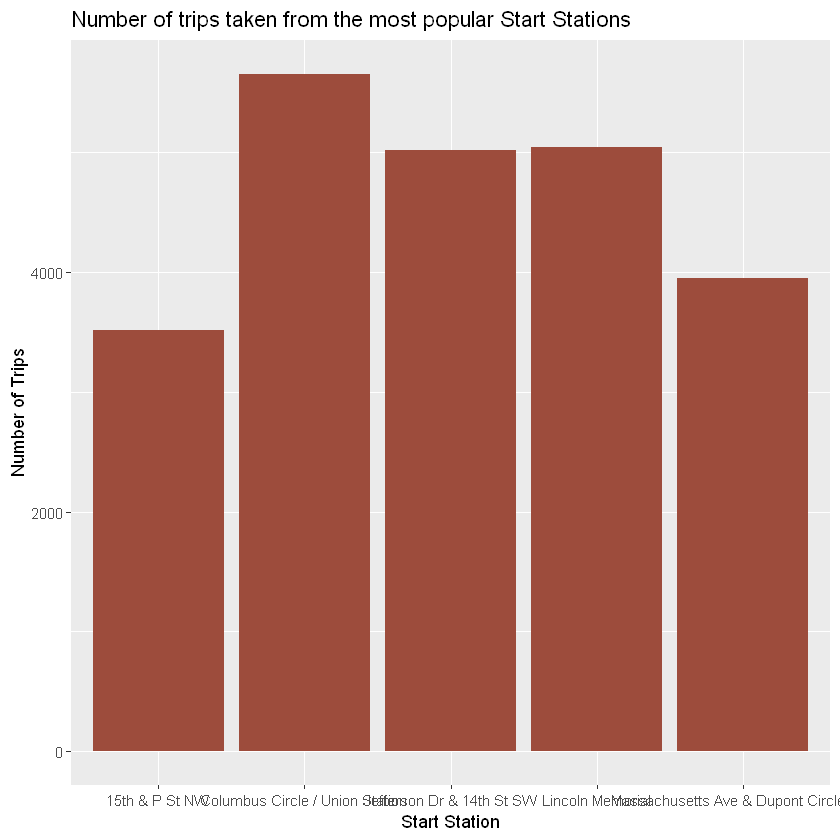

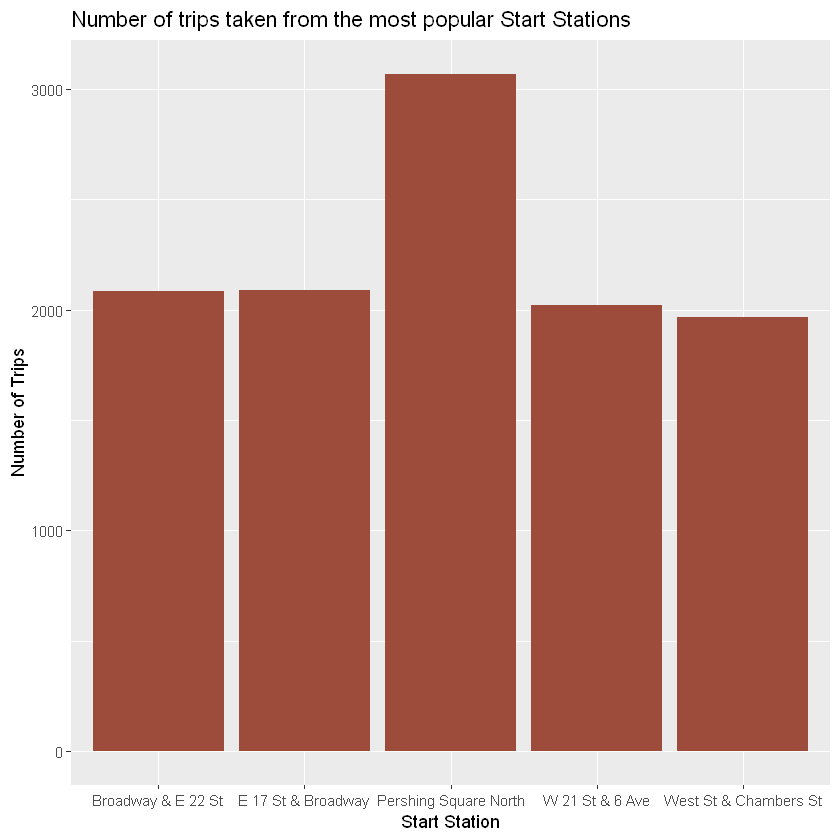

In [75]:
## Answer A
#Creating a function that identifies and create a plot of the top 5 start stations for an input data set
popular_start_staion <- function(data)
{y = head (summary(data$Start.Station) , 5)
names(y)
z = subset (data, data$Start.Station %in% names(y))
summary(z$Start.Station)

ggplot(aes(x=Start.Station), data= z) +
  geom_bar(stat = "count", fill= ('#9d4c3c')) +
  labs(x= "Start Station", y = "Number of Trips") +
  ggtitle("Number of trips taken from the most popular Start Stations")
}

## Calling the function and passing the data set.
popular_start_staion(chicago)
popular_start_staion(washington)
popular_start_staion(newyork)


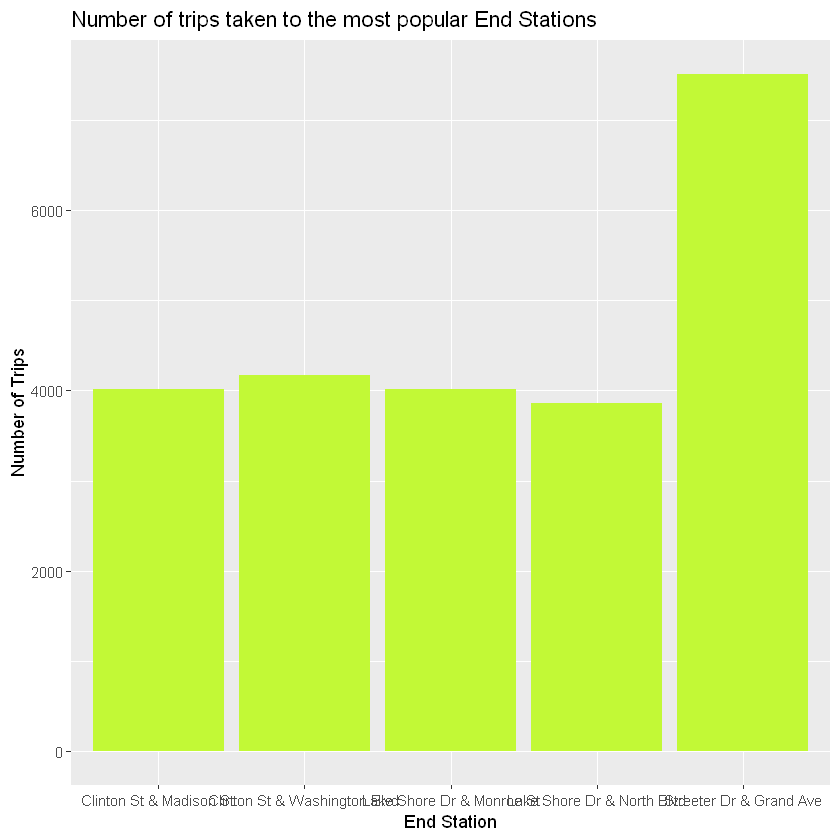

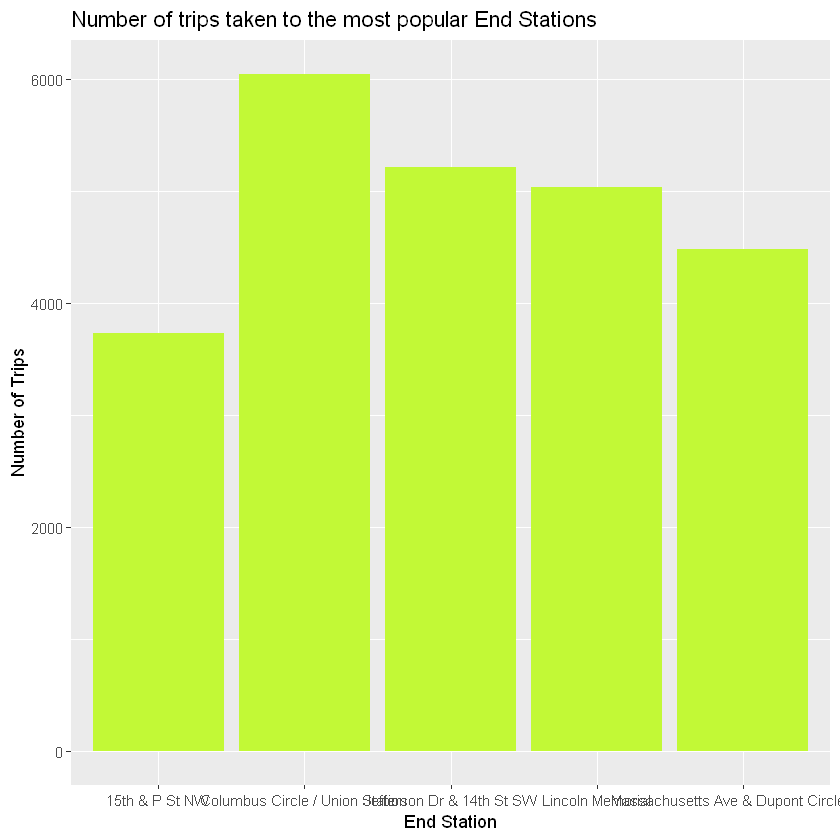

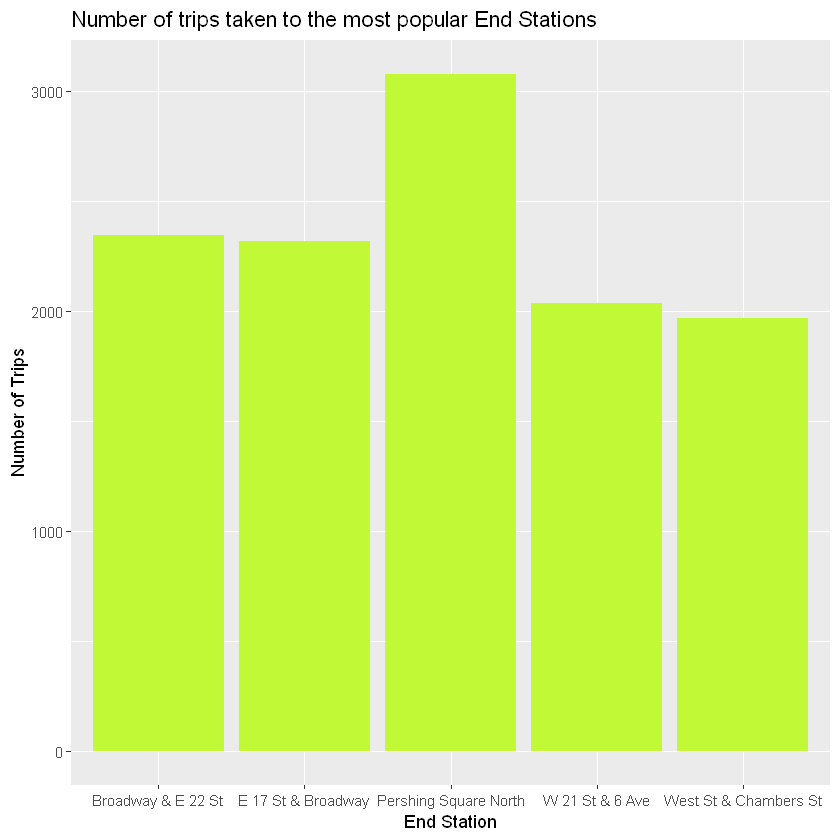

In [74]:
## Answer B
#Creating a function that identifies and create a plot of the top 5 end stations for an input data set
popular_end_staion <- function(data)
{y = head (summary(data$End.Station) , 5)
names(y)
z = subset (data, data$End.Station %in% names(y))
summary(z$End.Station)

ggplot(aes(x=End.Station), data= z) +
  geom_bar(stat = "count", fill= ('#c2f936')) +
  labs(x= "End Station", y = "Number of Trips") +
  ggtitle("Number of trips taken to the most popular End Stations")
}

## Calling the function and passing the data set as input.
popular_end_staion(chicago)
popular_end_staion(washington)
popular_end_staion(newyork)

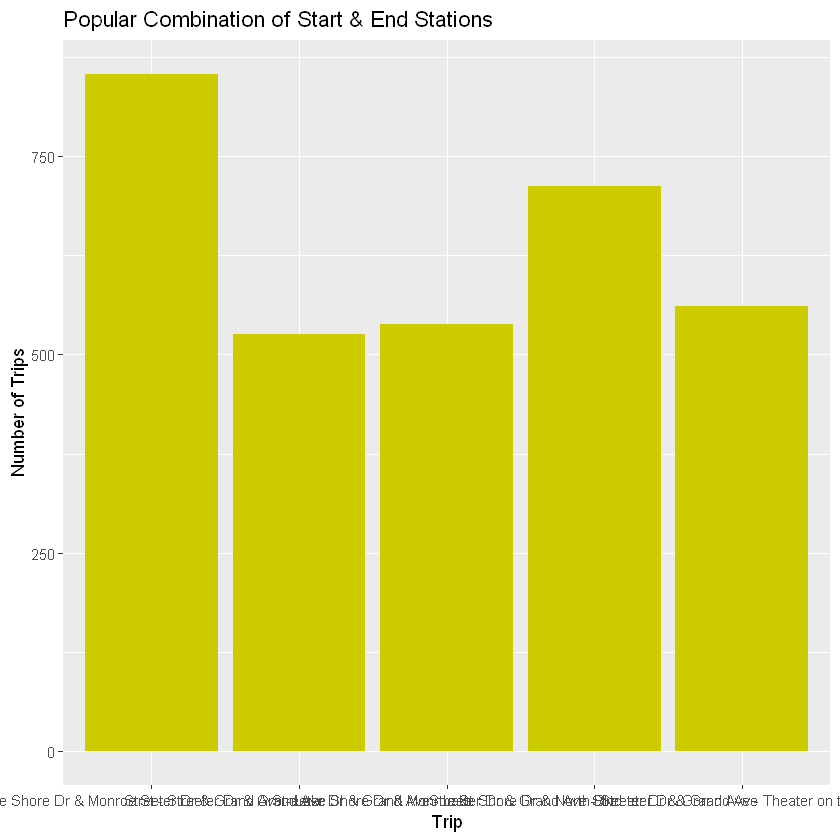

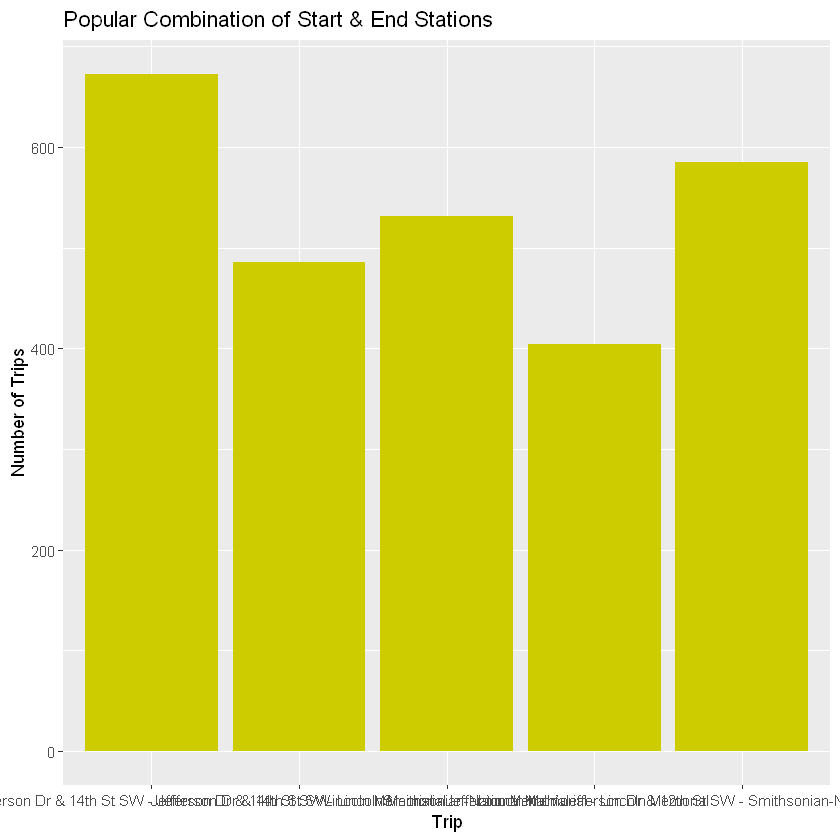

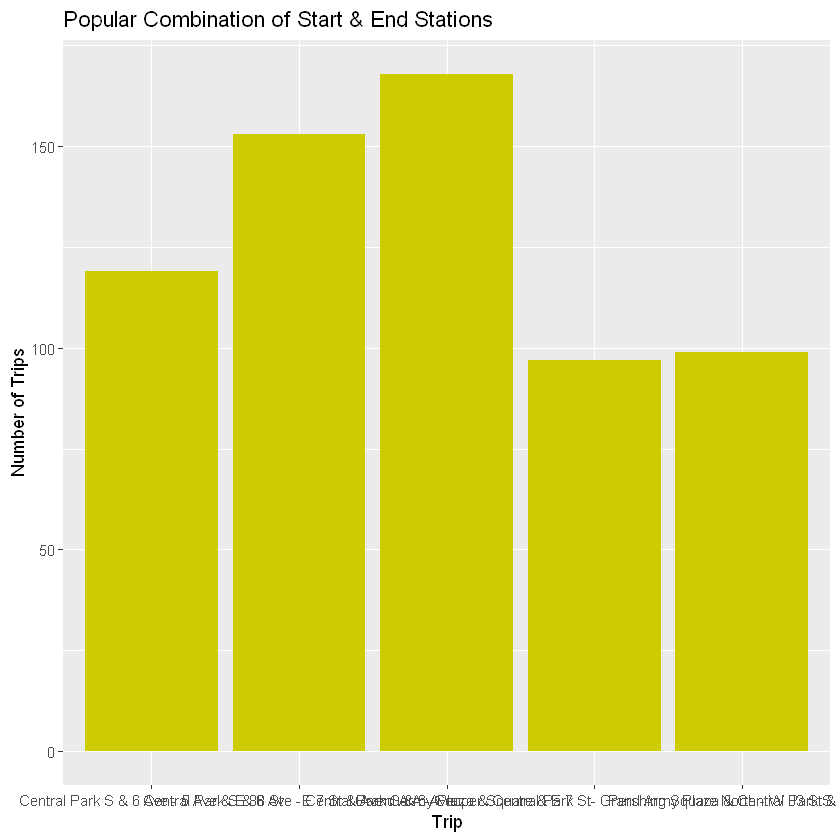

In [38]:
## Answer C
#Creating a function that identifies and create a plot of the most popular trips for each data set
popular_trips <- function(data)
{
    #Creates a column for a trip by concatenating the Start and End Stations seperated by a hyphen
    data$Trip <- paste(data$Start.Station, data$End.Station, sep=" - ")
    data$Trip=as.factor(data$Trip)
    
    y = head (summary(data$Trip) , 5)
    names(y)
    z = subset (data, data$Trip %in% names(y))
    summary(z$Trip)

    ggplot(aes(x=Trip), data= z) +
      geom_bar(stat = "count", fill=rgb(0.8, 0.8, 0.0)) +
      labs(x= "Trip", y = "Number of Trips") +
      ggtitle("Popular Combination of Start & End Stations")
}

## Calling the function and passing the data set as input.
popular_trips(chicago)
popular_trips(washington)
popular_trips(newyork)


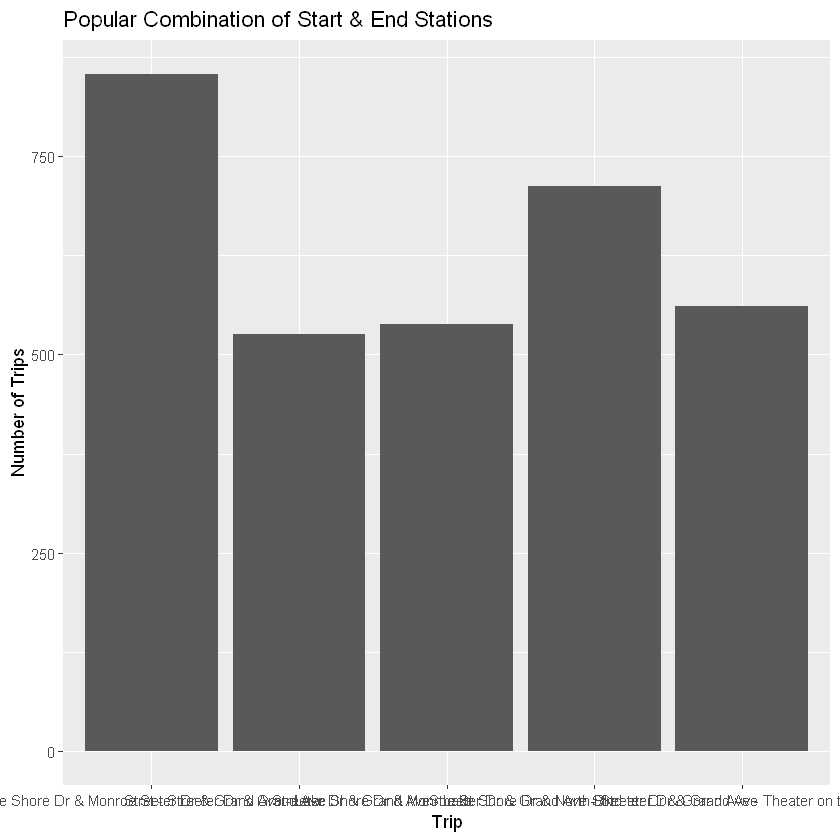

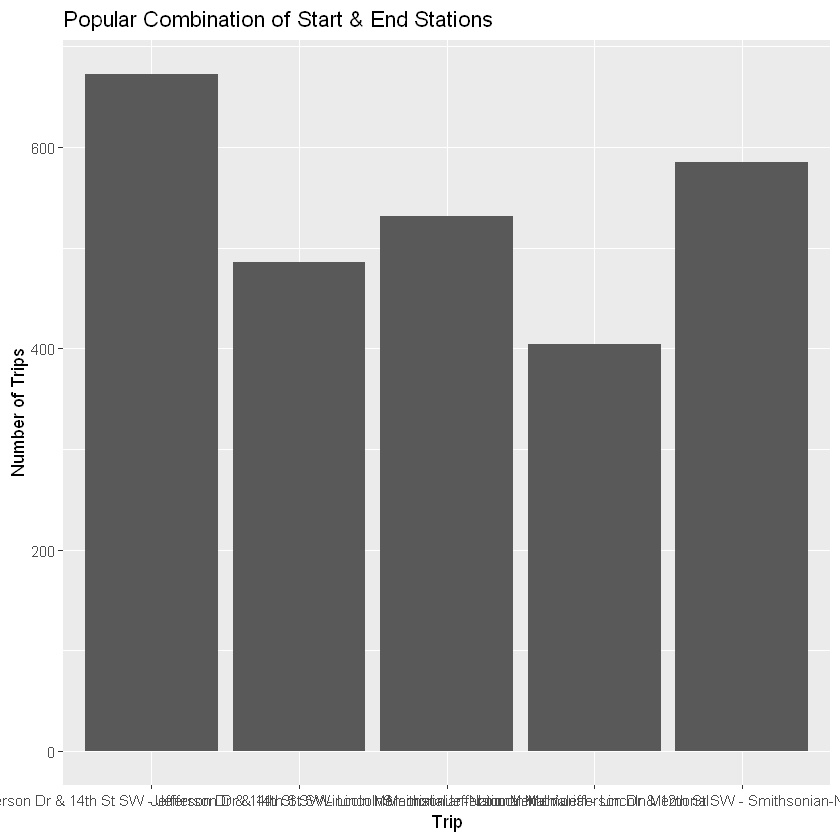

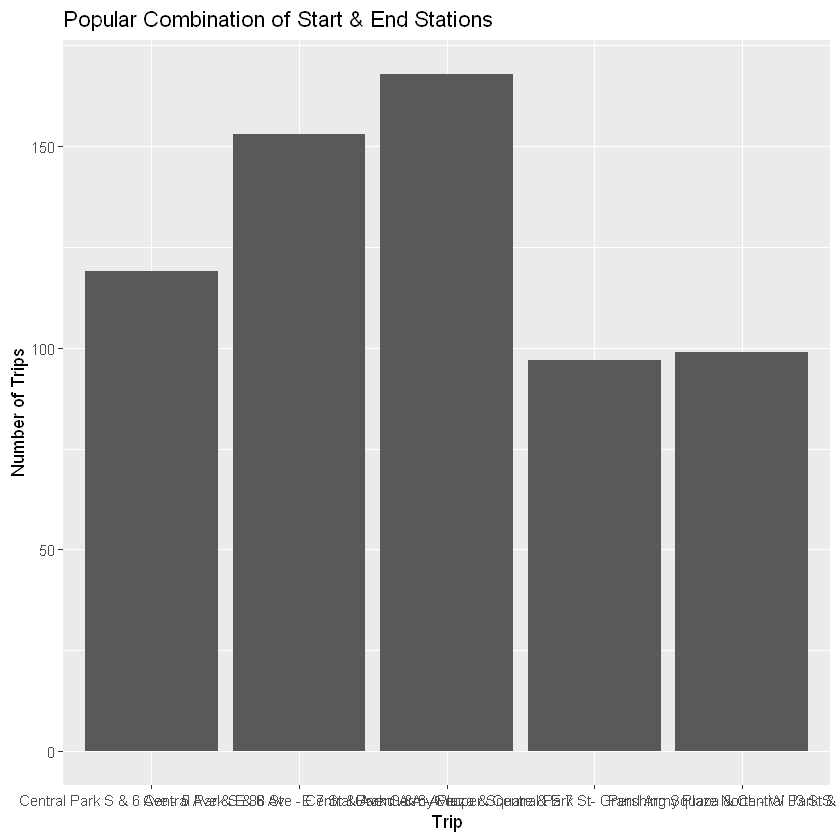

# Question 3

User info.

    a. What are the counts of the Customers and Subscribers for each city?
    b. What are the counts of each gender (for NYC and Chicago)?
    c. What User Type takes trips with longer duration?
    d. What Gender takes trips with longer duration (in NYC and Chicago)?


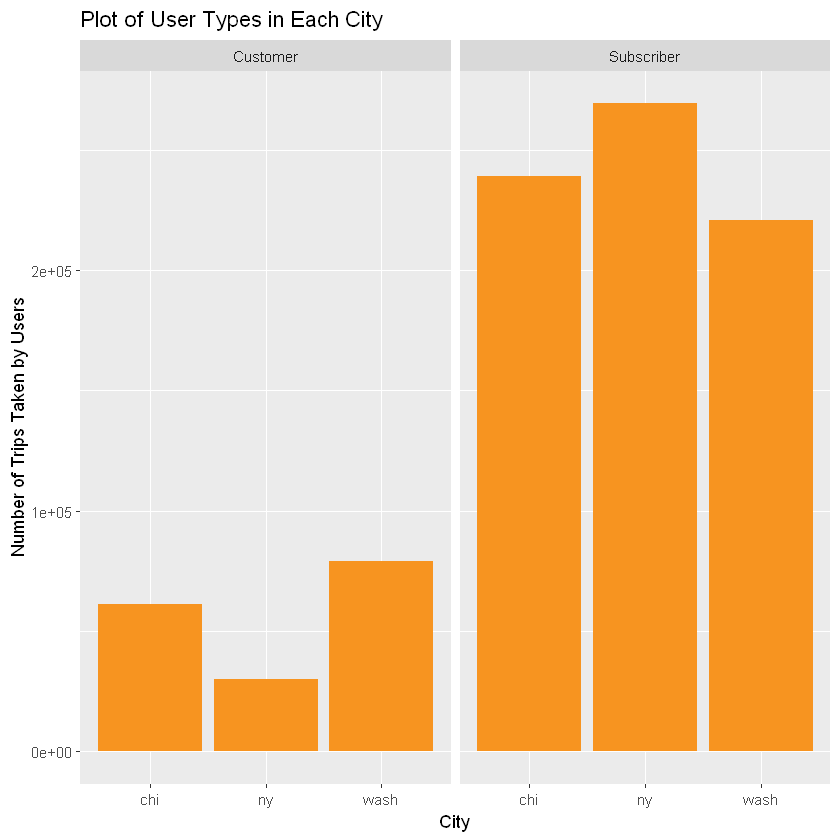

In [32]:
## Answer A
ggplot(aes(x=alias), data = subset(combined.trips1, User.Type=="Subscriber" | User.Type =="Customer")) +
  geom_bar(stat = "count", fill=('#F79420')) +
  facet_wrap(~User.Type) +
  labs(x= "City", y = "Number of Trips Taken by Users") +
  ggtitle("Plot of User Types in Each City")

In [98]:
##Summary of the UserTypes for Each of the Three Cities
by(combined.trips1$User.Type, combined.trips1$alias, summary)

combined.trips1$alias: chi
  Customer  Dependent Subscriber            
     61110          1     238889          0 
------------------------------------------------------------ 
combined.trips1$alias: ny
  Customer  Dependent Subscriber            
     30159          0     269149        692 
------------------------------------------------------------ 
combined.trips1$alias: wash
  Customer  Dependent Subscriber            
     79214          0     220786          0 

It is observed that the subscribers are more than the customers in each of the cities.
New York having the highest ratio of Subscriber to Customer

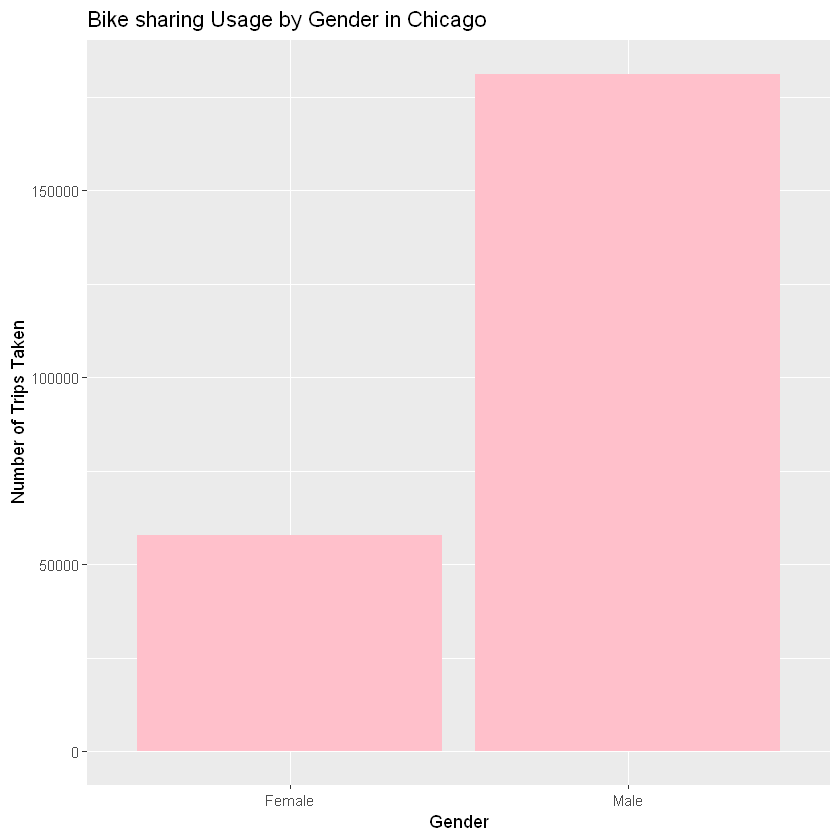

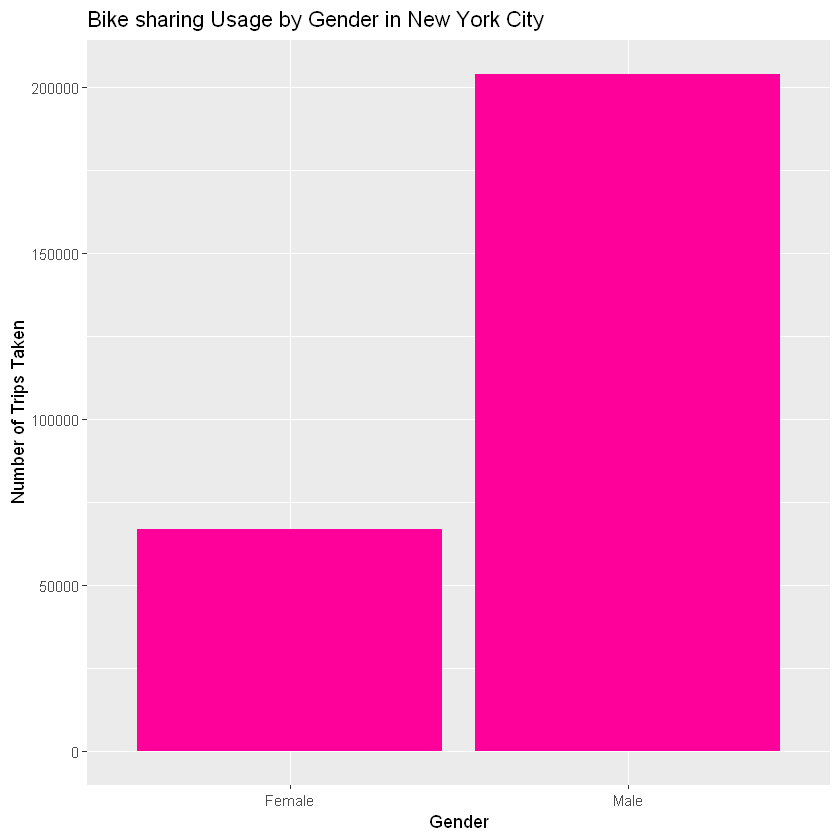

In [99]:
## Answer B
ggplot(aes(x= Gender), data = subset(chicago, Gender=="Male" | Gender =="Female")) +
  geom_bar(stat = 'count', fill=('#FFC0CB')) +
  labs(x= "Gender", y = "Number of Trips Taken") +
  ggtitle("Bike sharing Usage by Gender in Chicago")


ggplot(aes(x= Gender), data = subset(newyork, Gender=="Male" | Gender =="Female")) +
  geom_bar(stat = 'count', fill=('#fe019a')) +
  labs(x= "Gender", y = "Number of Trips Taken") +
  ggtitle("Bike sharing Usage by Gender in New York City")



In [110]:
##Summary showing the number of trips taken by each gender in nyc and chicago.
table(chicago$Gender)
table(newyork$Gender)


       Female   Male 
 61052  57758 181190 


       Female   Male 
 29209  66783 204008 

There are more male users that female users in both Chicago and NYC

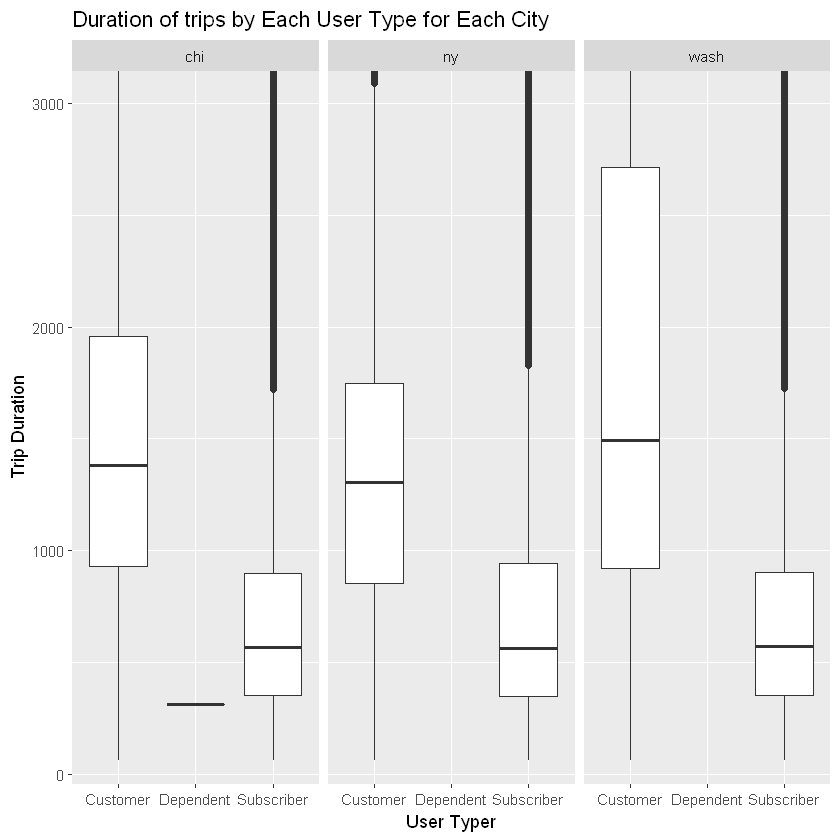

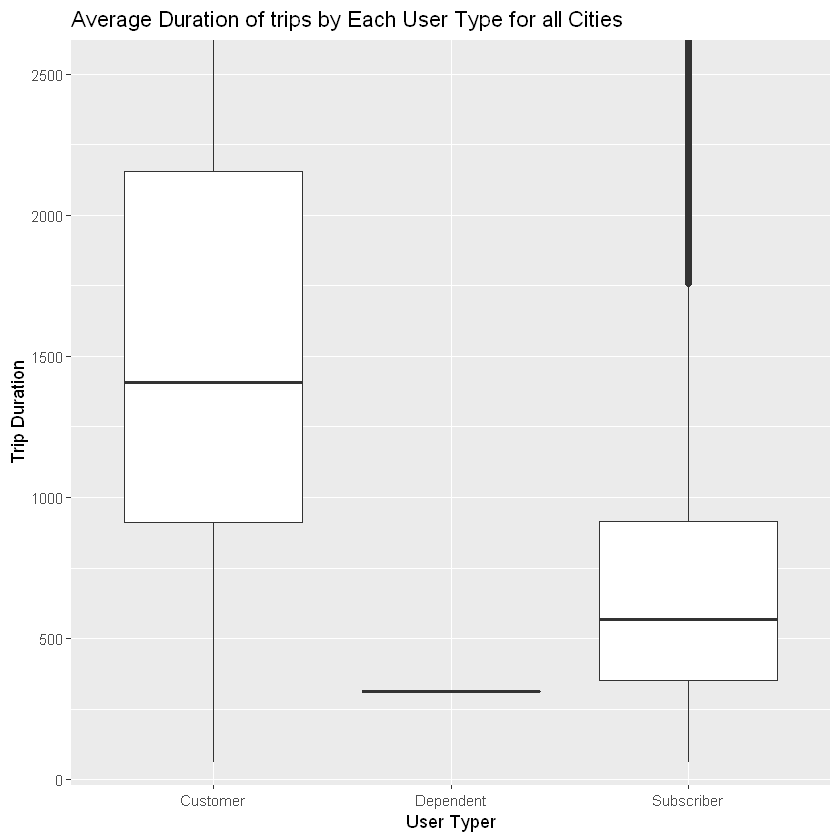

In [83]:
## Answer C
qplot( x= User.Type, y= Trip.Duration,
       data = subset(combined.trips1, User.Type!=""),
       geom = 'boxplot') +
  coord_cartesian(ylim = c(100, 3000)) +
  labs(x= "User Typer", y = "Trip Duration") +
  ggtitle("Duration of trips by Each User Type for Each City") +
  facet_wrap(~alias)

qplot( x= User.Type, y= Trip.Duration,
       data = subset(combined.trips1, User.Type!=""),
       geom = 'boxplot') +
  coord_cartesian(ylim = c(100, 2500)) +
  labs(x= "User Typer", y = "Trip Duration") +
  ggtitle("Average Duration of trips by Each User Type for all Cities")

In [94]:
by(chicago$Trip.Duration, chicago$User.Type, summary)
by(newyork$Trip.Duration, newyork$User.Type, summary)
by(washington$Trip.Duration, washington$User.Type, summary)

chicago$User.Type: Customer
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   927.2  1380.0  1862.5  1960.0 86224.0 
------------------------------------------------------------ 
chicago$User.Type: Dependent
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    311     311     311     311     311     311 
------------------------------------------------------------ 
chicago$User.Type: Subscriber
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   351.0   565.0   699.3   899.0 85742.0 

newyork$User.Type: 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   62.0   732.5  1120.5  1473.0  1531.5 51595.0 
------------------------------------------------------------ 
newyork$User.Type: Customer
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     61     854    1304    2056    1749 2155775 
------------------------------------------------------------ 
newyork$User.Type: Subscriber
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    61.0    349.0    564.0    768.6    941.0 591523.0 

washington$User.Type: Customer
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     60.1     920.0    1492.2    2635.1    2717.4 1235662.2 
------------------------------------------------------------ 
washington$User.Type: Subscriber
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    60.0    353.5    570.3    735.8    902.7 451434.9 

Surprisingly it can be observed that Customers take longer trips on the average than Suscribers in all three cities.
Also noteworthy, Washington customers take longer trips than the other two cities.

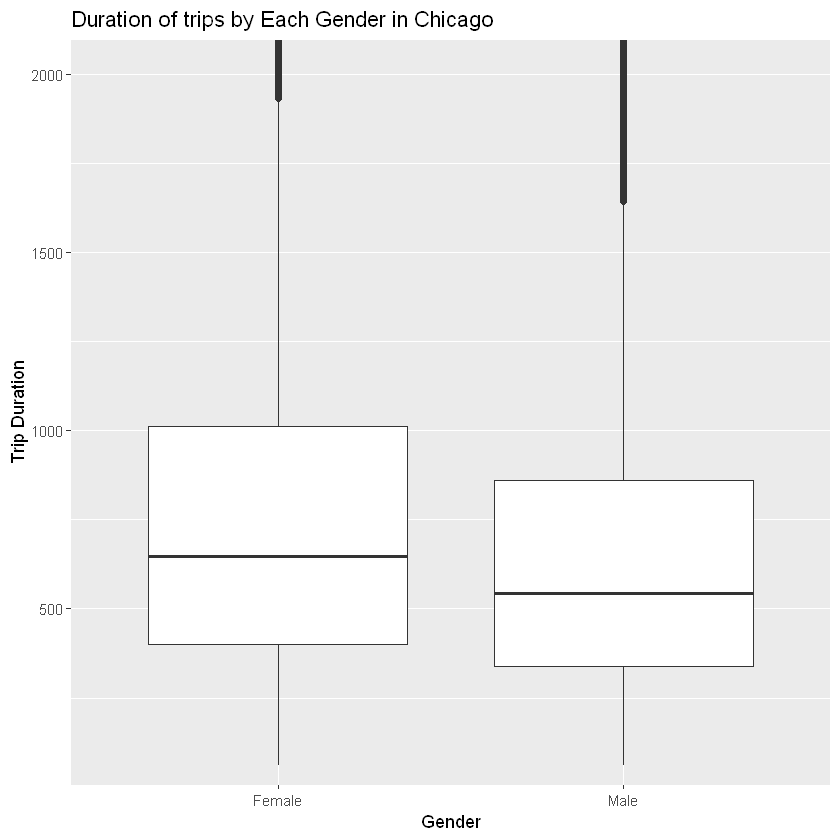

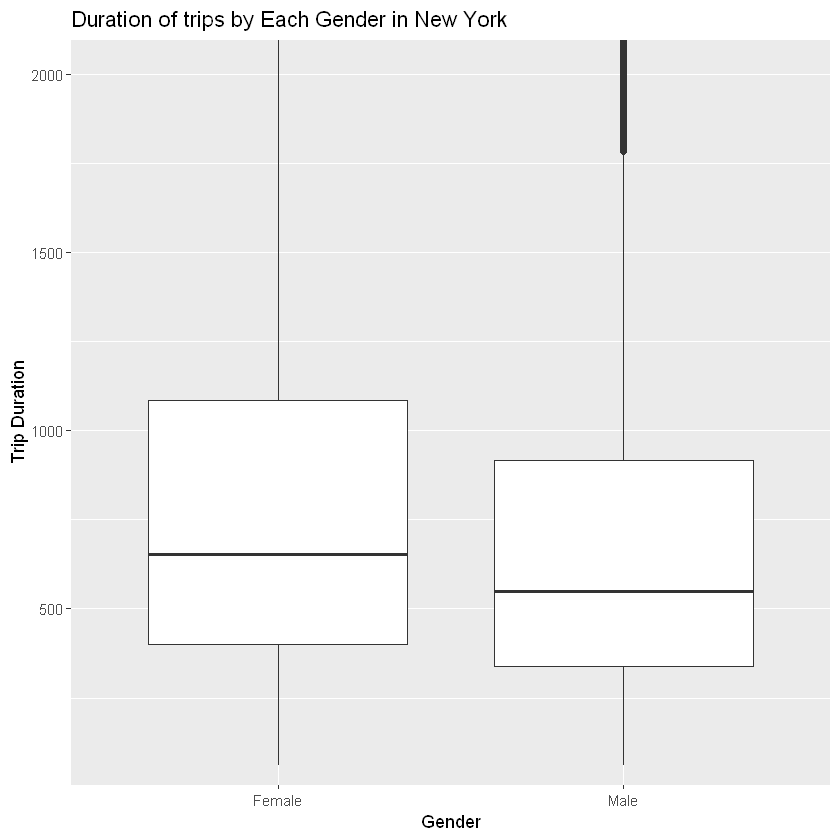

In [85]:
##Answer D
qplot(x= Gender, y= Trip.Duration,
       data = subset(chicago, Gender!=""), 
       geom = 'boxplot') +
  coord_cartesian(ylim = c(100, 2000)) +
  labs(x= "Gender", y = "Trip Duration") +
  ggtitle("Duration of trips by Each Gender in Chicago")

qplot(x= Gender, y= Trip.Duration,
       data = subset(newyork, Gender!=""), 
       geom = 'boxplot') +
  coord_cartesian(ylim = c(100, 2000)) +
  labs(x= "Gender", y = "Trip Duration") +
  ggtitle("Duration of trips by Each Gender in New York")

In [97]:
by(chicago$Trip.Duration, chicago$Gender, summary)
by(newyork$Trip.Duration, newyork$Gender, summary)

chicago$Gender: 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     60     928    1380    1863    1961   86224 
------------------------------------------------------------ 
chicago$Gender: Female
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   400.0   648.0   781.5  1012.0 85742.0 
------------------------------------------------------------ 
chicago$Gender: Male
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   339.0   542.0   673.2   860.0 85572.0 

newyork$Gender: 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     61     754    1240    1811    1711  499410 
------------------------------------------------------------ 
newyork$Gender: Female
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    61.0    401.0    652.0    886.7   1086.0 332970.0 
------------------------------------------------------------ 
newyork$Gender: Male
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     61.0     339.0     548.0     773.5     916.0 2155775.0 

Female take longer trips than male in both cities. 